# <center >Data Science with Python 
## <center >Statistical and Data Technique in Data Science 
##  <center> Homework 4

## Introduction

We will be using customer data from a [Portuguese wholesale distributor](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers) for clustering. This data file is called `Wholesale_Customers_Data`.

It contains the following features:

* Fresh: annual spending (m.u.) on fresh products
* Milk: annual spending (m.u.) on milk products
* Grocery: annual spending (m.u.) on grocery products
* Frozen: annual spending (m.u.) on frozen products
* Detergents_Paper: annual spending (m.u.) on detergents and paper products
* Delicatessen: annual spending (m.u.) on delicatessen products
* Channel: customer channel (1: hotel/restaurant/cafe or 2: retail)
* Region: customer region (1: Lisbon, 2: Porto, 3: Other)

In this data, the values for all spending are given in an arbitrary unit (m.u. = monetary unit).

### Question 1: Data information
* Download data from the link: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers
(or in the folder attached customers).
* Import the data as the name 'data' and check the data head, shape, types, columms. (*Hint:*   `.head()`, `.shape`, `.dtypes`, `.columns.tolist()`.).
* Convert columns excluding 'Channel' and 'Region' to floats if necessary (*Hint:*  `.astype(np.float)`.)
* Drop out 'Chanel','Region' 'Frozen', 'Detergents_Paper', 'Delicassen' as they will not be used 

In [6]:
import pandas as pd
import numpy as np
# Load the data
data = pd.read_csv("Wholesale_customers.csv")
print(data.head())
print(data.shape)
print(data.dtypes)
print(data.columns.tolist())


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
(440, 8)
Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object
['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']


- There are 8 variables and 440 observations
- The type of data of 8 variables are integer

In [8]:
data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']] = data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].astype(float)
print(data.dtypes)

Channel               int64
Region                int64
Fresh               float64
Milk                float64
Grocery             float64
Frozen              float64
Detergents_Paper    float64
Delicassen          float64
dtype: object


After changing the data type, data types of all variables except Channel and Region, are complex numbers.

In [9]:
data.drop(['Channel', 'Region','Frozen', 'Detergents_Paper', 'Delicassen'], axis=1, inplace=True)
print(data.columns.tolist())

['Fresh', 'Milk', 'Grocery']


Drop some variables

### Quesiton 2: Statistical Description
In this question, we only work on the feature 'Grocery'.
 * Calculate the min, Q1 (i.e., 25%),  median, , Q3(i.e.,75%), max of the annual spending on grocery products
 * Calculate the mean, range, standard deviation (std), skewness, kurtosis index of the annual spending on grocery products.
 * Make a boxplot of the annual spending on grocery products.
 * Make a histogram of the annual spending on grocery products.

In [14]:
data.drop(['Fresh', 'Milk'], axis=1, inplace=True)
print(data.columns.tolist())

KeyError: "labels ['Fresh' 'Milk'] not contained in axis"

In [15]:
print(data.describe())

            Grocery
count    440.000000
mean    7951.277273
std     9503.162829
min        3.000000
25%     2153.000000
50%     4755.500000
75%    10655.750000
max    92780.000000


In [16]:
print(data.skew())

Grocery    3.587429
dtype: float64


In [17]:
print(data.kurt())

Grocery    20.91467
dtype: float64


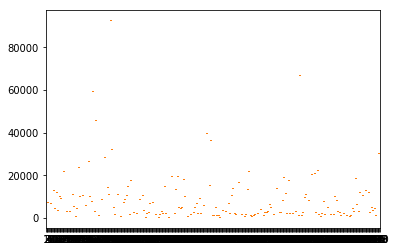

In [21]:
import matplotlib.pyplot as plt
plt.boxplot(data)
plt.show()

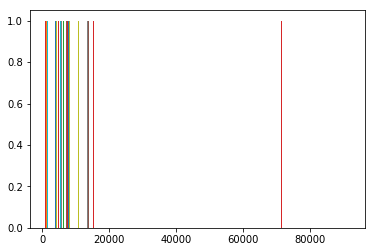

In [22]:
plt.hist(data)
plt.show()

### Question 3: Correlation
* Calculate the correlation of 'Grocery' and 'Milk'.
* Make a scatter plot of 'Grocery' and 'Milk'. (*Hint:* Using Matplotlib `.scatter`)
* Make a scatter plot of features together. (*Hint:*  Using Panda `.scatter_matrix`)
* Make a heatmap of features together. (*Hint:* Using Seaborn `.heatmap` )

In [24]:
# Write your answer from here, add more cells if needed
data = pd.read_csv("Wholesale_customers.csv")
print(data.columns.tolist())
print(data.corr())



['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
                   Channel    Region     Fresh      Milk   Grocery    Frozen  \
Channel           1.000000  0.062028 -0.169172  0.460720  0.608792 -0.202046   
Region            0.062028  1.000000  0.055287  0.032288  0.007696 -0.021044   
Fresh            -0.169172  0.055287  1.000000  0.100510 -0.011854  0.345881   
Milk              0.460720  0.032288  0.100510  1.000000  0.728335  0.123994   
Grocery           0.608792  0.007696 -0.011854  0.728335  1.000000 -0.040193   
Frozen           -0.202046 -0.021044  0.345881  0.123994 -0.040193  1.000000   
Detergents_Paper  0.636026 -0.001483 -0.101953  0.661816  0.924641 -0.131525   
Delicassen        0.056011  0.045212  0.244690  0.406368  0.205497  0.390947   

                  Detergents_Paper  Delicassen  
Channel                   0.636026    0.056011  
Region                   -0.001483    0.045212  
Fresh                    -0.101953    

Correlation between Grocery and Milk variable is 0.728335

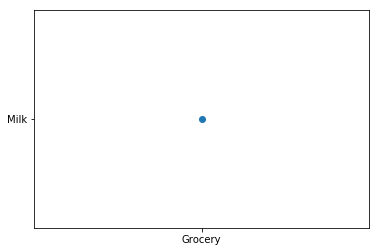

In [25]:
plt.scatter('Grocery', 'Milk')
plt.show()

### Question 4: Hypothesis testing (part 1)
* Find the p-values of the non-correlation of pairs: ('Grocery', 'Milk'), ('Grocery', 'Fresh'), ('Fresh','Milk').
* With the significance level 0.1 (p-given or $\alpha$=0.1), do we reject or accept the hypothesis:"'Grocery' and 'Milk' are corellated."
* With the significance level 0.1 (p-given or $\alpha$=0.1), do we reject or accept the hypothesis:"'Grocery' and 'Milk' are corellated."
* With the significance level 0.1 (p-given or $\alpha$=0.1), do we reject or accept the NULL hypothesis:"'Grocery' and 'Milk' are non-corellated."

In [ ]:
# Write your answer from here, add more cells if needed

### Question 5: Data Preprocessing
* Transform the data by using `np.log` and set the new data as the name 'log_data', then visualize this data by using `pd.scatter_matrix`.
* Remove outliers of each features of 'log_data' whose are out of the fencies "$Q1-IQR*1.5$" and "$Q3+IQR*1.5$", set the new data by the name 'good_log_data' then visualize this data.  

In [ ]:
# Write your answer from here, add more cells if needed

### Question 6: Hypothesis testing (part 2) 

 By the method one-sample-t-test, do we accept the following hypotheses with the significant value 0.05 (i.e., p_given)?
* The mean of 'Fresh' population (after log-transform) by using the log_data set is different 8.8
* The mean of 'Fresh' population (after log-transform) by using the good_log_data set is differenct 8.8

By the method of two-sample-t-test, do we acept the following hypotheses with the significant value 0.05 (i.e., p_given)?
* The means of 'Fresh' in the log_data and good_log_data are different
* The means of 'Milk' in the log_data and good_log_data are different


In [ ]:
# Write your answer from here, add more cells if needed